## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing

## Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
    
)

Found 95 files belonging to 4 classes.


### Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 95 files belonging to 4 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [12]:
for x,y in training_set:
 print(x)
 print(y)
 break

tf.Tensor(
[[[[1.10000000e+01 0.00000000e+00 4.00000000e+00]
   [1.10000000e+01 0.00000000e+00 4.00000000e+00]
   [1.10000000e+01 0.00000000e+00 4.00000000e+00]
   ...
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]]

  [[1.10000000e+01 0.00000000e+00 4.00000000e+00]
   [1.10000000e+01 0.00000000e+00 4.00000000e+00]
   [1.10000000e+01 0.00000000e+00 4.00000000e+00]
   ...
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]]

  [[1.10000000e+01 0.00000000e+00 4.00000000e+00]
   [1.10000000e+01 0.00000000e+00 4.00000000e+00]
   [1.10000000e+01 0.00000000e+00 4.00000000e+00]
   ...
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]
   [8.00000000e+00 3.00000000e+00 0.00000000e+00]]

  ...

  [[3.00000000e+00 1.00000000e+00 4.00000000e+00]
   [3

### To Avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There maybe a chance of underfitting so increase the number of neurons
3. Add more convolution layer to extract more feature from image 

### Building Model

In [16]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()

In [20]:
## building Convolution Layer

In [22]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu')) 
model.add(MaxPool2D(pool_size=2,strides=2)) 

In [32]:
model.add(Dropout(0.25)) # to avoid overfitting

In [34]:
model.add(Flatten())

In [36]:
model.add(Dense(units=1500,activation='relu'))

In [38]:
model.add(Dropout(0.3)) 

## output Layer


In [41]:
model.add(Dense(units=4,activation='softmax'))

## compiling Model

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [49]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.2355 - loss: 1.8951 - val_accuracy: 0.4526 - val_loss: 1.2917
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3444 - loss: 1.3457 - val_accuracy: 0.5368 - val_loss: 1.2205
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4240 - loss: 1.2759 - val_accuracy: 0.5684 - val_loss: 1.1256
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4620 - loss: 1.2037 - val_accuracy: 0.5263 - val_loss: 1.0740
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4829 - loss: 1.0899 - val_accuracy: 0.5579 - val_loss: 1.0060
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6150 - loss: 0.9780 - val_accuracy: 0.6737 - val_loss: 0.9128
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6127 - loss: 1.0015 - val_accuracy: 0.6526 - val_loss: 0.8314
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7538 - loss: 0.8551 - val_accuracy: 0.6947 - val_loss: 0.7717
Epoch 9/10
3/3 

### Model Evaluation

### Model Evaluation on training set

In [54]:
train_loss,train_acc = model.evaluate(training_set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 456ms/step - accuracy: 0.7526 - loss: 0.6383


In [56]:
print(train_loss,train_acc)

0.632655918598175 0.7473683953285217


In [58]:
val_loss,val_acc = model.evaluate(validation_set)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step - accuracy: 0.7643 - loss: 0.6374


In [60]:
print(val_loss,val_acc)

0.632655918598175 0.7473683953285217


### Saving Model

In [64]:
model.save("trained_model.keras")

In [65]:
training_history.history['val_accuracy']

[0.4526315927505493,
 0.5368421077728271,
 0.5684210658073425,
 0.5263158082962036,
 0.557894766330719,
 0.6736842393875122,
 0.6526315808296204,
 0.6947368383407593,
 0.75789475440979,
 0.7473683953285217]

In [68]:
### Recording History in json
import json
with open("training_hist.json","w") as f:
     json.dump(training_history.history,f)

### Accuracy Visualization

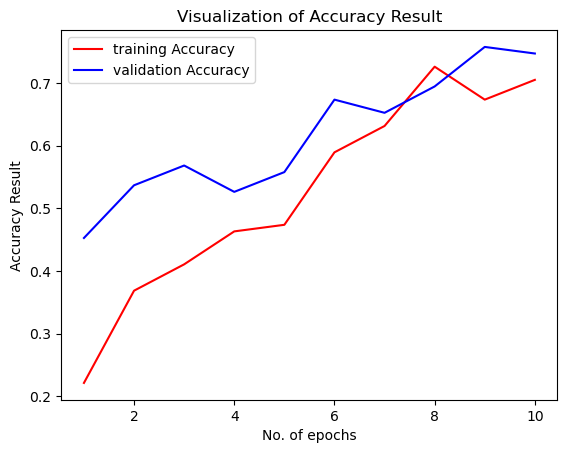

In [72]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metric for model evaluation

In [76]:
class_name = validation_set.class_names
class_name

['Egg_Class B', 'Egg_Fresh Class AA', 'Egg_Fresh Class B', 'Egg_stale']

In [79]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 95 files belonging to 4 classes.


In [81]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step


(array([[0.18532701, 0.3276895 , 0.46472752, 0.0222559 ],
        [0.6230341 , 0.03391128, 0.1693237 , 0.17373091],
        [0.2428139 , 0.4974802 , 0.15041645, 0.10928941],
        [0.06583522, 0.8052451 , 0.01642825, 0.11249141],
        [0.4055889 , 0.24961789, 0.20002526, 0.14476791],
        [0.32614353, 0.56632787, 0.05247758, 0.05505103],
        [0.32294428, 0.3378403 , 0.23558009, 0.10363533],
        [0.59472275, 0.00293438, 0.39452252, 0.00782035],
        [0.59472275, 0.00293438, 0.39452252, 0.00782035],
        [0.72592515, 0.00819199, 0.26389024, 0.00199264],
        [0.73026395, 0.09174612, 0.12699749, 0.05099238],
        [0.19475847, 0.30820355, 0.19508177, 0.30195624],
        [0.94105387, 0.00752999, 0.03916097, 0.01225514],
        [0.59472275, 0.00293438, 0.39452252, 0.00782035],
        [0.06616551, 0.8592535 , 0.06625637, 0.00832461],
        [0.97992444, 0.00570371, 0.00937228, 0.00499953],
        [0.32294428, 0.3378403 , 0.23558009, 0.10363533],
        [0.725

In [83]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [85]:
predicted_categories

<tf.Tensor: shape=(95,), dtype=int64, numpy=
array([2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 1, 3], dtype=int64)>

In [87]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(95, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
 

In [89]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(95,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3], dtype=int64)>

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                    precision    recall  f1-score   support

       Egg_Class B       0.69      0.55      0.61        20
Egg_Fresh Class AA       0.69      0.91      0.78        34
 Egg_Fresh Class B       0.82      0.64      0.72        22
         Egg_stale       0.88      0.79      0.83        19

          accuracy                           0.75        95
         macro avg       0.77      0.72      0.74        95
      weighted avg       0.76      0.75      0.74        95



In [94]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(4, 4)

### Confusion Matrix Visualization

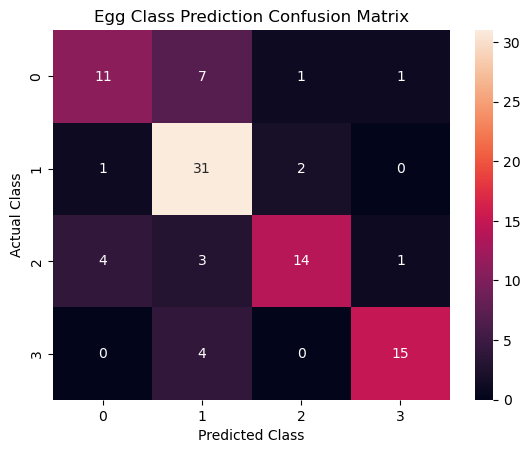

In [99]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class") 
plt.title("Egg Class Prediction Confusion Matrix")
plt.show()